In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.backends.backend_pdf as backend_pdf
import matplotlib.pyplot as plt
import re
from numpy import genfromtxt
from ete3 import Tree
import seaborn as sns
import arviz as az

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nnodes = 9
tree = Tree('../data/chazot_subtree.nw') 


In [3]:
leafidx = []
inneridx = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)


niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]


In [5]:
reg = re.compile('^_')
_folder = '../_BM14/runs' # change this to the folder where the runs from ranktest are 
bfolder = os.listdir(_folder)
bfolder_ignore = ['.DS_Store', 'README.txt', '_','figures', 'other', 'rhat-paths.pdf', 'mse_paths.pdf', 'rhat-pars.pdf', 'bias_paths.pdf','bias_pars.pdf','mse_paths.pdf', 'mse_pars.pdf', 'ranks_gtheta.pdf','ranks_gtheta_sqrt.pdf','ranks_kalpha.pdf', 'ranks.pdf', 'all_ranks.pdf']
[bfolder.remove(bi) for bi in bfolder_ignore if bi in bfolder] # ignore specific files
print(bfolder)
n=len(bfolder)

rhats_paths = []
bias_mean_paths = []
bias_mode_paths = []
bias_median_paths = []

rhats_pars = []
bias_mean_pars = []
bias_mode_pars = []
bias_median_pars = []

for subfolder in bfolder:
    print(subfolder)
    #subsubfolder = os.listdir(_folder+'/'+subfolder)
    _subsubfolder = [x for x in os.listdir(_folder+'/'+subfolder) if bool(reg.match(x))]
    subsubfolder = [x for x in _subsubfolder if x not in ['.DS_Store', '_ri.csv', '_ri_gtheta.csv', '_ri_gtheta_sqrt.csv', '_ri_kalpha.csv', 'other']]
    #print(subsubfolder)
    print(subsubfolder)
    bfolder = subsubfolder[0]
    #print(bfolder)
    folder = _folder+'/'+subfolder+"/"+bfolder+'/'
    print(folder)

    rhats_pars.append(genfromtxt(folder+'rhats_pars.csv', delimiter=','))
    bias_mean_pars.append(genfromtxt(folder+'bias_mean_pars.csv', delimiter=','))
    bias_mode_pars.append(genfromtxt(folder+'bias_mode_sm_pars.csv', delimiter=','))
    bias_median_pars.append(genfromtxt(folder+'bias_median_pars.csv', delimiter=','))

    crhats = genfromtxt(folder+'rhats_paths.csv', delimiter=',')
    if np.amax(np.array(crhats[inneridx,:]))>1.15:
        print("*!!!!POSSIBLY NOT CONVERGED")
        print(f"max: {np.amax(np.array(crhats))}")
        print(crhats)
    rhats_paths.append(crhats)
    #bias_mean_paths.append(genfromtxt(folder+'bias_mean.csv', delimiter=','))
    #bias_mode_paths.append(genfromtxt(folder+'bias_mode.csv', delimiter=','))
    #bias_median_paths.append(genfromtxt(folder+'bias_median.csv', delimiter=','))


all_rhats_paths = np.array(rhats_paths)
#all_bias_mean_paths = np.array(bias_mean_paths)
#all_bias_median_paths = np.array(bias_median_paths)

all_rhats_pars = np.array(rhats_pars) #data seeds x nnodes x dimensions
all_bias_mean_pars = np.array(bias_mean_pars)
all_bias_mode_pars = np.array(bias_mode_pars)
all_bias_median_pars = np.array(bias_median_pars)




['9674556098655156', '18700432274776213', '30429446992157503', '90849722873644648', '41755986115290599', '62997046336084773', '85391614096545007', '21404740432090790', '67855982124208903', '28586596323144229', '58533480461832464', '76224234038895386', '85480232375402055', '58358840425350604', '81687392501552613', '54840232720046073', '68194055844923624', '80210069330650986', '46030474277614981', '80791734420679377', '10398070428630118', '91635330682532182', '51550678282095355', '39632560095419664', '37385460610258721', '14413502938691930', '92471980015705348', '47989456319179394', '88348749514565830', '77894135034492286', '99928736335880867', '84233005379373428', '25471448139883117', '47633459462633850', '47521162963208594', '98897419427499140', '25913534165034601', '50258436239942354', '31649733123904478', '70515420850538573', '33509783100923938', '86725968085599542', '47038153262495700', '38125610668333119', '15525519432459495', '80788646513981273', '24226169555019545', '198429053601

In [6]:
reg = re.compile('^_')
bfolder = os.listdir(_folder)
print(bfolder)
#bfolder_ignore = ['.DS_Store', '_','landmarks8_ranks_root.pdf', 'rhat-paths.pdf', 'rhat-pars.pdf', 'bias_pars.pdf', 'bias_paths.pdf', 'mse_pars.pdf','mse_paths.pdf', 'ranks.pdf', 'all_ranks.pdf','sampled_parameters.pdf', 'ranks_kalpha.pdf', 'ranks_gtheta.pdf']
[bfolder.remove(bi) for bi in bfolder_ignore if bi in bfolder] # ignore specific files

_gthetas = []
_kalphas = []
seeds_nc = []
for subfolder in bfolder:
    _subsubfolder = [x for x in os.listdir(_folder+'/'+subfolder) if not bool(reg.match(x))]
    subsubfolder = [x for x in _subsubfolder if x not in ['.DS_Store']]
    bfolder = subsubfolder[0]
    folder = _folder+'/'+subfolder+"/"+bfolder+'/'
    cri = np.genfromtxt(folder+'true_kalpha.csv')
    tgtheta = np.genfromtxt(folder+'true_gtheta.csv')
    _kalphas.append(cri)
    _gthetas.append(tgtheta)
    seeds_nc.append(subfolder)


# %%

all_kalphas = np.array(_kalphas)
all_gthetas = np.array(_gthetas)



['9674556098655156', '18700432274776213', '30429446992157503', '90849722873644648', '41755986115290599', '62997046336084773', '85391614096545007', '21404740432090790', '67855982124208903', '28586596323144229', '58533480461832464', '76224234038895386', '85480232375402055', '58358840425350604', '81687392501552613', '54840232720046073', '68194055844923624', '80210069330650986', '.DS_Store', '46030474277614981', '80791734420679377', '10398070428630118', '91635330682532182', '51550678282095355', '39632560095419664', '37385460610258721', '14413502938691930', '92471980015705348', '47989456319179394', '88348749514565830', '77894135034492286', '99928736335880867', '84233005379373428', '25471448139883117', '47633459462633850', '47521162963208594', '98897419427499140', '25913534165034601', '50258436239942354', '31649733123904478', '70515420850538573', '33509783100923938', '86725968085599542', '47038153262495700', '38125610668333119', '15525519432459495', '80788646513981273', '24226169555019545', 

# Look at convergence

In [7]:
if not os.path.isdir(_folder+'/figures'): 
    os.mkdir(_folder+'/figures')

## Parameters

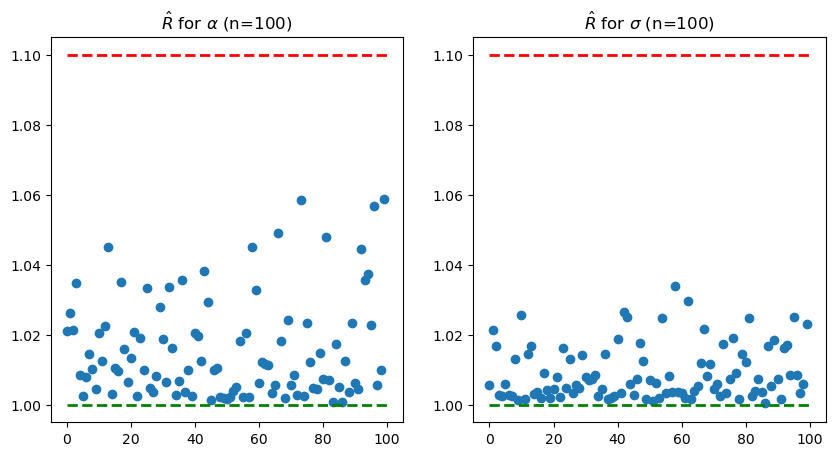

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5), sharex=True)

axes[0].scatter(list(range(len(all_rhats_pars[:,0]))), all_rhats_pars[:,0])
axes[0].hlines(y=1.1, xmin=0, xmax=len(all_rhats_pars[:,0]), color='red', linestyle='dashed', linewidth=2)
axes[0].hlines(y=1.0, xmin=0, xmax=len(all_rhats_pars[:,0]), color='green', linestyle='dashed', linewidth=2)
axes[0].set_title(r'$\hat{R}$ for $\alpha$'+f' (n={n})')

axes[1].scatter(list(range(len(all_rhats_pars[:,1]))), all_rhats_pars[:,1])
axes[1].hlines(y=1.1, xmin=0, xmax=len(all_rhats_pars[:,1]), color='red', linestyle='dashed', linewidth=2)
axes[1].hlines(y=1.0, xmin=0, xmax=len(all_rhats_pars[:,1]), color='green', linestyle='dashed', linewidth=2)
axes[1].set_title(r'$\hat{R}$ for $\sigma$'+f' (n={n})')
plt.savefig(_folder + f'/figures/rhat-pars.pdf')

## Plot rhat for all dimensions of all internal nodes

In [9]:
pdf = backend_pdf.PdfPages(_folder + f'/figures/rhat-paths.pdf')
plt.figure(1)
max_rhat = np.amax(all_rhats_paths)
for idx in inneridx: # loop over innernodes
    print(idx)
    fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(25,15), sharex=True)
    for i, ax in zip(range(all_rhats_paths.shape[2]), axes.flat): # loop over dimensions
        ax.scatter(list(range(len(all_rhats_paths[:,idx,i]))), all_rhats_paths[:,idx,i])
        ax.hlines(y=1.1, xmin=0, xmax=len(all_rhats_paths[:,idx,i]), color='red', linestyle='dashed', linewidth=2)
        ax.hlines(y=1.0, xmin=0, xmax=len(all_rhats_paths[:,idx,i]), color='green', linestyle='dashed', linewidth=2)
        ax.set_ylim(ymax=max_rhat+0.005, ymin=0.95)
    fig.suptitle(f'Node {idx} (n={n})', size=40)
    pdf.savefig()
    plt.clf()
pdf.close();

0
1
2
6


<Figure size 640x480 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

## Plot all combinations of parameters used

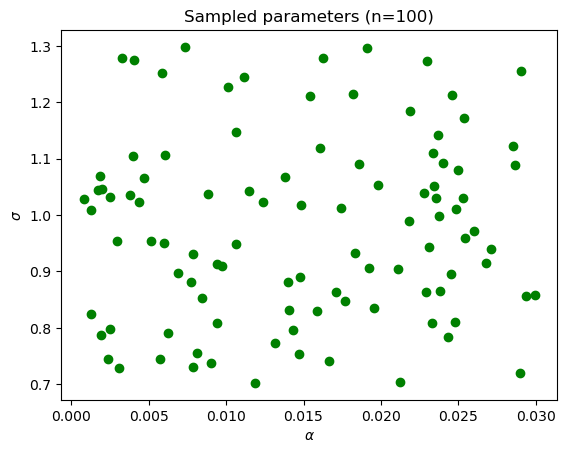

In [10]:
fig, ax = plt.subplots()
ax.scatter(all_kalphas, all_gthetas, color='green')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma$')
plt.title(f'Sampled parameters (n={n})')
plt.savefig(f'{_folder}/figures/sampled_parameters.pdf')

# Plot bias for mean, median and mode estimator (parameters)
The code below is used to generate figure 6 in the paper. 

In [11]:
all_bias_mean_pars.shape

(100, 2)

In [12]:
# pars 
_bias_mean_pars =np.mean(all_bias_mean_pars, axis=0).flatten() 
_bias_median_pars =np.mean(all_bias_median_pars, axis=0).flatten() 
_bias_mode_pars =np.mean(all_bias_mode_pars, axis=0).flatten() 


In [13]:
mean_true_alpha = np.mean(all_kalphas)
mean_true_gtheta = np.mean(all_gthetas)

In [14]:
from scipy import stats

In [15]:
2*stats.sem(all_bias_mean_pars[:,0]/mean_true_alpha)

0.051293602037607286

In [16]:
bias_pars = pd.DataFrame({
    'bias':np.array([all_bias_mean_pars.flatten(),all_bias_median_pars.flatten(), all_bias_mode_pars.flatten()]).flatten(), 
    'estimator':['mean']*2*len(all_bias_mean_pars)+['median']*2*len(all_bias_median_pars)+['mode']*2*len(all_bias_median_pars), 
    'mean_true_pars': [mean_true_alpha, mean_true_gtheta]*len(all_bias_mean_pars)+[mean_true_alpha, mean_true_gtheta]*len(all_bias_mean_pars)+[mean_true_alpha, mean_true_gtheta]*len(all_bias_mean_pars),
    'type': ['alpha','sigma']*len(all_bias_mean_pars)+['alpha','sigma']*len(all_bias_mean_pars)+['alpha','sigma']*len(all_bias_mean_pars)})

bias_pars['bias/mean'] = bias_pars.apply(lambda row: row.bias/row.mean_true_pars, axis=1)
bias_pars

,bias,estimator,mean_true_pars,type,bias/mean
0,0.005219,mean,0.014866,alpha,0.351092
1,0.158570,mean,0.976709,sigma,0.162352
2,0.001528,mean,0.014866,alpha,0.102789
3,0.144106,mean,0.976709,sigma,0.147543
4,0.011971,mean,0.014866,alpha,0.805252
...,...,...,...,...,...
595,-0.344624,mode,0.976709,sigma,-0.352842
596,-0.000781,mode,0.014866,alpha,-0.052519
597,0.071946,mode,0.976709,sigma,0.073662
598,-0.003387,mode,0.014866,alpha,-0.227821


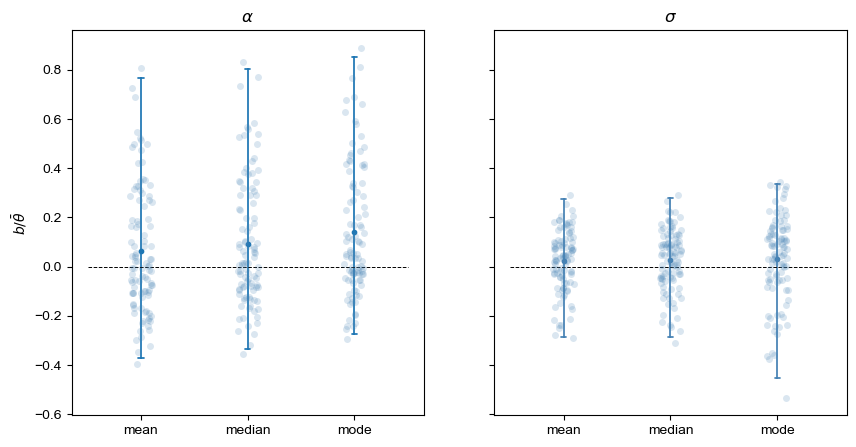

In [17]:
errorbar = ('pi', 99)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10,5), sharey=True)
sns.set(style="ticks", rc={"lines.linewidth": 0.7})

sns.pointplot(data=bias_pars.loc[bias_pars['type']=='alpha'], x='estimator', 
                    y='bias/mean', linestyle='', 
                    errorbar=errorbar, marker='o',
                    capsize=0.05, ax=ax[0])
sns.stripplot(data=bias_pars.loc[bias_pars['type']=='alpha'], x='estimator', 
                    y='bias/mean',  
                    color='steelblue', alpha=0.2, 
                     ax=ax[0])
ax[0].set_title(r'$\alpha$')
left, right = plt.xlim()
ax[0].hlines(0, xmin=left-0.5, xmax=right+1.5, color='black', linestyles='--')
ax[0].xaxis.label.set_visible(False)
#ax[0].yaxis.label.set_visible(False)
ax[0].set(ylabel=r'$b/\bar{\theta}$')

sns.pointplot(data=bias_pars.loc[bias_pars['type']=='sigma'], x='estimator', 
                    y='bias/mean', linestyle='', 
                    errorbar=errorbar,marker='o',
                    color='steelblue',
                    capsize=0.05, ax=ax[1])
sns.stripplot(data=bias_pars.loc[bias_pars['type']=='sigma'], x='estimator', 
                    y='bias/mean',  
                    color='steelblue', alpha=0.2,
                     ax=ax[1])
ax[1].set_title(r'$\sigma$')
ax[1].hlines(0, xmin=left-0.5, xmax=right+1.5, color='black', linestyles='--')
ax[1].xaxis.label.set_visible(False)
#plt.suptitle(f'Bias for parameters (n={n})')
plt.savefig(_folder + f'/figures/bias_pars_mean_true.pdf') 


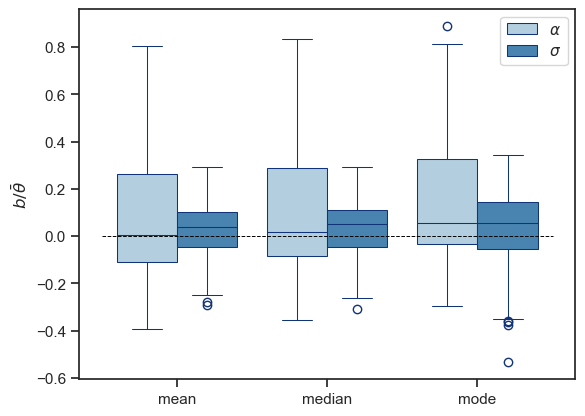

In [23]:
bp = sns.boxplot(data=bias_pars, x='estimator', hue='type',
                    y='bias/mean', linecolor="#137", linewidth=.75, palette="Blues")
plt.ylabel(ylabel=r'$b/\bar{\theta}$')
plt.xlabel('')
bp.legend_.set_title(None)
handles, legend = bp.get_legend_handles_labels()
bp.legend(handles, [r'$\alpha$', r'$\sigma$'])
plt.hlines(0, xmin=-0.5, xmax=2.5, color='black', linestyles='--')
plt.savefig('../_BM14/paper/bias_estimators.pdf')

Compute Wald confidence intervals. 

In [24]:
import numpy as np, scipy.stats as st

def get_wald_conf(a): 
    upper = np.mean(a) - st.norm.ppf(0.995, loc=0, scale=1)*(np.std(a)/np.sqrt(len(a)))
    lower = np.mean(a) + st.norm.ppf(0.995, loc=0, scale=1)*(np.std(a)/np.sqrt(len(a)))
    return(np.mean(a), (upper, lower))

In [25]:
alpha =  bias_pars.loc[bias_pars['type']=='alpha']
sigma =  bias_pars.loc[bias_pars['type']=='sigma']

In [26]:
get_wald_conf(sigma.loc[sigma['estimator']=='mean']['bias'])

(0.022974386811266, (-0.007912662474199687, 0.05386143609673169))

In [27]:
get_wald_conf(sigma.loc[sigma['estimator']=='median']['bias'])

(0.02764180522713883, (-0.003244216460709947, 0.058527826914987605))

In [28]:
get_wald_conf(sigma.loc[sigma['estimator']=='mode']['bias'])

(0.028927251796811607, (-0.015095733316590722, 0.07295023691021393))

In [29]:
get_wald_conf(alpha.loc[alpha['estimator']=='mean']['bias'])

(0.0009605957485314405, (-1.6529970254882233e-05, 0.0019377214673177632))

In [30]:
get_wald_conf(alpha.loc[alpha['estimator']=='median']['bias'])

(0.0013813084140259543, (0.0004053676557158331, 0.0023572491723360756))

In [31]:
get_wald_conf(alpha.loc[alpha['estimator']=='mode']['bias'])

(0.002063467859295076, (0.0010491441276633015, 0.0030777915909268503))

# Code for generating figure XX in paper
This is the code used for generating figure 4 in the paper. 

In [34]:
# settings 
MCMC_iter = 3000
burnin = 1000
nthin = 1 # see from script/running conditions, not used for plotting
folder_runs = '../_BM14/runs/44235505776566716/' #"BM9/runs/3513656273068705/" #
folder_simdata = '../_BM14/simdata/44235505776566716/' #'BM9/simdata/3513656273068705/' #args.folder_simdata +'/'
nnodes = 9
#levelorder_tree = Tree('chazot_subtree_levelorder.nw') 
nxd = 40
pars_name = ['kalpha', 'gtheta']
rep_path = len(pars_name)+1
chains = os.listdir(folder_runs) # use all chains in data seed folder 
chains = [c for c in chains if c[0] not in ['_', '.']] # remove files starting with underscore
print(chains)

# read true parameters
true_pars = [np.genfromtxt(folder_simdata +p+"_sim.csv", delimiter = ",") for p in pars_name]
true_pars

# PLOT TRACE AND DENSITY FOR PARAMETERS
# wait with array in case of irregular dimensions 
temp_name = ['' for i in range(len(chains))]
raw_pars = [[np.genfromtxt(folder_runs + chains[i]+'/'+temp_name[i]+par+"s.csv", delimiter = ",") for i in range(len(chains))] for par in pars_name]
raw_acceptpars = [[np.genfromtxt(folder_runs + chains[i]+'/'+temp_name[i]+"acceptkalpha.csv", delimiter = ",") for i in range(len(chains))] for par in pars_name]

pars = [np.array([raw_pars[j][i][burnin:MCMC_iter] for i in range(len(raw_pars[0]))]) for j in range(len(raw_pars))]
[p.shape for p in pars]
acceptpars = [np.array([raw_acceptpars[j][i][burnin:MCMC_iter] for i in range(len(raw_acceptpars[0]))]) for j in range(len(raw_acceptpars))]
[ap.shape for ap in acceptpars]


['wobbly-elevator-86', 'driven-sunset-89', 'comfy-haze-97']


[(3, 2000), (3, 2000)]

In [35]:
# get rhat for parameters 
parsdict = dict(zip(pars_name, pars)) 
MCMC_result = parsdict #parsdict|innernodedict
parsres = az.convert_to_dataset(MCMC_result)
rhat = az.rhat(parsres)
mcse = az.mcse(parsres)
ess = az.ess(parsres)
az.summary(parsres)

# save rhat for plotting
rhats_par = np.array([rhat['kalpha'], rhat['gtheta']])

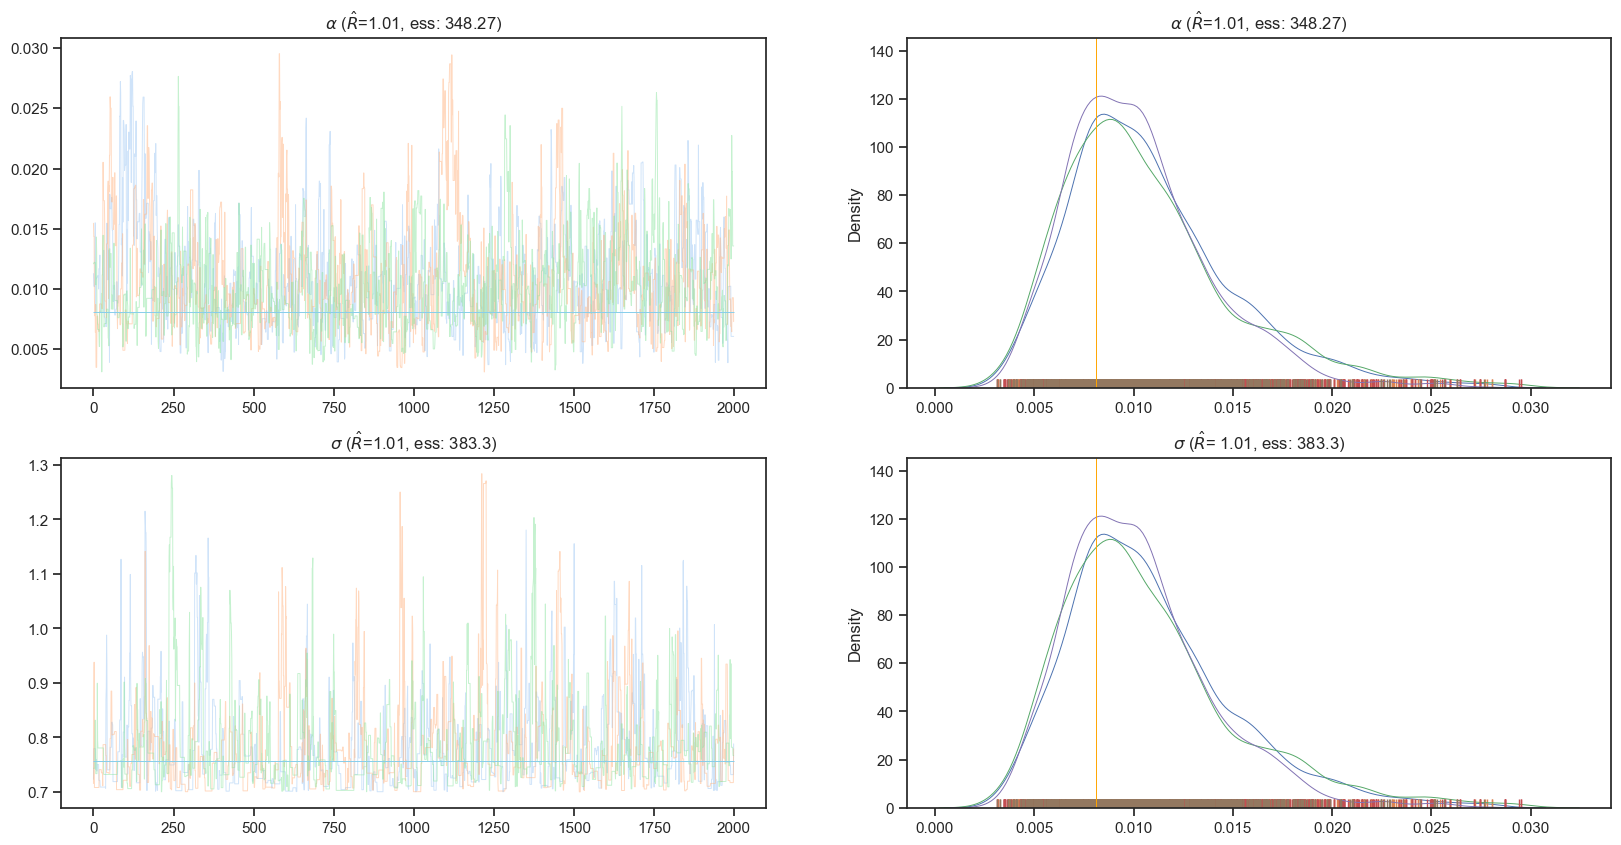

In [40]:
true_vals = true_pars #[true_pars]
keys = pars_name
colors = sns.color_palette('pastel', len(chains))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
p = 0
cp = 0
name = ['$\alpha$']
for i, ax in zip(range(len(axes.flat)), axes.flat): 
        if i%2 == 0: 
            for j in range(pars[p].shape[0]): #loop over chains 
                ax.plot(pars[p][j,:], color=colors[j], alpha=0.5)
            ax.hlines(y=true_vals[p], xmin=0, xmax=pars[p].shape[1], color='skyblue')
            #ax.set_title(f'{keys[p]}, rhat: {round(float(np.array(rhat[keys[p]])),2)} \n (ess: {round(float(np.array(ess[keys[p]])),2)}) ')
            p+=1
        if i%2==1:
            for j in range(pars[cp].shape[0]):
                sns.kdeplot(pars[cp][j,:], ax=ax)
                sns.rugplot(pars[cp][j,:], ax=ax)
            ax.axvline(x = true_vals[cp], ymin = 0, ymax = 1, color='orange') 
            #ax.set_title(f'{keys[cp]}, rhat: {round(float(np.array(rhat[keys[cp]])),2)} \n (ess: {round(float(np.array(ess[keys[cp]])),2)}) ')#
            
        #if i%3==2:
        #    ax.scatter(list(range(len(all_rhats_pars[:,cp]))), all_rhats_pars[:,cp])
        #    ax.hlines(y=1.1, xmin=0, xmax=len(all_rhats_pars[:,cp]), color='red', linestyle='dashed', linewidth=2)
        #    ax.hlines(y=1.0, xmin=0, xmax=len(all_rhats_pars[:,cp]), color='green', linestyle='dashed', linewidth=2)
        #    cp+=1

#fig.suptitle(f"Iter: {MCMC_iter}, Burnin: {burnin} \n", fontsize=15)
#fig.tight_layout()

axes[0,0].set_title(r'$\alpha$ ($\hat{R}$='+ f'{round(float(np.array(rhat[keys[0]])),2)}, ess: {round(float(np.array(ess[keys[0]])),2)})')
axes[0,1].set_title(r'$\alpha$ ($\hat{R}$='+ f'{round(float(np.array(rhat[keys[0]])),2)}, ess: {round(float(np.array(ess[keys[0]])),2)})')
#axes[0,2].set_title(r'$\alpha$')

axes[1,0].set_title(r'$\sigma$ ($\hat{R}$='+ f'{round(float(np.array(rhat[keys[1]])),2)}, ess: {round(float(np.array(ess[keys[1]])),2)})')
axes[1,1].set_title(r'$\sigma$ ($\hat{R}$= '+ f'{round(float(np.array(rhat[keys[1]])),2)}, ess: {round(float(np.array(ess[keys[1]])),2)})')
#axes[1,2].set_title(r'$\sigma$')

plt.savefig(f'{_folder}/figures/convergence_plot_paper.pdf')